<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Complete%20ML%20Tutorial%20with%20TF%20and%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Complete ML Tutorial with TF and Keras**

**Tensorflow** has 2 main components that we will try to understand
1. Graphs
2. Sessions

Tensorflow works by building a graph of a defined computations. Nothing is computed or stored in this graph. It is simply a way of defining the operations that have been written in code.

A TF Sessions allows part of the graphs to be executed. It allocates memory and resources and handels the execution of the operations and computatuions we have defined.

In some instances we will need to run a session to be able to execute parts of the graphs we've created earlier.

**Installing Tensorflow**

In [ ]:
!pip install tensorflow

If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. 

In [ ]:
!pip install tensorflow-gpu

**Importing TensorFlow**

The first step here is going to be to select the correct version of TensorFlow from within collabratory!

In [ ]:
%tensorflow_version 2.x 

In [ ]:
import tensorflow as tf #now import the tensorflow module
print(tf.version) #Make sure the version is 2.x

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


**Tensors**

"A **Tensor** is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

It should't surprise you that tensors are a fundemental apsect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape.

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In the next sections we will discuss some different properties of tensors. This is to make you more familiar with how tensorflow represnts data and how you can manipulate this data.

**Creating Tensors**

Below is an example of how to create some different tensors.

You simply define the value of the tensor and the datatype and you are good to go! It's worth mentioning that usually we deal with tensors of numeric data, it is quite rare to see string tensors.

For a full list of datatypes please refer to the following guide.

https://www.tensorflow.org/api_docs/python/tf/dtypes/DType?version=stable

In [ ]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

string, number, floating

(<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.567>)

**Rank/Degree of Tensors**

Another word for rank is degree, these terms simply mean the number of dimensions involved in the tensor. What we created above is a tensor of rank 0, also known as a scalar.

Now we'll create some tensors of higher degrees/ranks.

In [ ]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["Test", "Ok"], ["Test", "Ok"]], tf.string) 

rank1_tensor, rank2_tensor

(<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'Test'], dtype=object)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=string, numpy=
 array([[b'Test', b'Ok'],
        [b'Test', b'Ok']], dtype=object)>)

To determine the rank of a tensor we can call the following method.

In [ ]:
tf.rank(rank1_tensor), tf.rank(rank2_tensor)

(<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

The rank of a tensor is direclty related to the deepest level of nested lists. You can see in the first example ["Test"] is a rank 1 tensor as the deepest level of nesting is 1. Where in the second example [["test", "ok"], ["test", "yes"]] is a rank 2 tensor as the deepest level of nesting is 2.

To get the **shape** of a tensor we use the shape attribute.

In [ ]:
rank1_tensor.shape, rank2_tensor.shape

(TensorShape([1]), TensorShape([2, 2]))

**Changing Shape**

The number of elements of a tensor is the product of the sizes of all its shapes. There are often many shapes that have the same number of elements, making it convient to be able to change the shape of a tensor.

The example below shows how to change the shape of a tensor.

In [ ]:
# tf.ones() creates a shape [1,2,3] tensor full of ones
tensor1 = tf.ones([1,2,3])

# reshape existing data to shape [2,3,1]
tensor2 = tf.reshape(tensor1, [2,3,1])

# -1 tells the tensor to calculate the size of the dimension in that place # this will reshape the tensor to [3,3]
tensor3 = tf.reshape(tensor2, [3, -1])

# The numer of elements in the reshaped tensor MUST match the number in the original

In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


**Slicing Tensors**

You may be familiar with the term "slice" in python and its use on lists, tuples etc. Well the slice operator can be used on tensors to select specific axes or elements.

When we slice or select elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value refrences a different dimension of the tensor.

`Ex: tensor[dim1, dim2, dim3]`

I've included a few examples that will hopefully help illustrate how we can manipulate tensors with the slice operator.

In [ ]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32) 
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [ ]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


**Types of Tensors**
Before we go to far, I will mention that there are diffent types of tensors. These are the most used and we will talk more in depth about each as they are used.

- Variable
- Constant
- Placeholder
- SparseTensor

With the execption of Variable all these tensors are immuttable, meaning their value may not change during execution.

For now, it is enough to understand that we use the Variable tensor when we want to potentially change the value of our tensor.

**TensorFlow Core Learning Algorithms**

In this notebook we will walk through 4 fundemental machine learning algorithms. We will apply each of these algorithms to unique problems and datasets before highlighting the use cases of each.

The algorithms we will focus on include:

- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

It is worth noting that there are many tools within TensorFlow that could be used to solve the problems we will see below. I have chosen the tools that I belive give the most variety and are easiest to use.

**Linear Regression**

Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

This section is based on the following documentation: https://www.tensorflow.org/tutorials/estimator/linear

**Setup and Imports**

Before we get started we must install sklearn and import the following modules.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

**Feature Columns**

In our dataset we have two different kinds of information: **Categorical and Numeric**

Our categorical data is anything that is not numeric! For example, the sex column does not use numbers, it uses the words "male" and "female".

Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2).

Fortunately for us TensorFlow has some tools to help!

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

**The Training Process**

So, we are almost done preparing our dataset and I feel as though it's a good time to explain how our model is trained. Specifically, how input data is fed to our model.

For this specific model data is going to be streamed into it in small batches of **32**. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of epochs.

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have **10** ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an input function. The input function simply defines how our dataset will be converted into batches at each epoch.

**Input Function**

The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object. This means we must create a input function that can convert our current pandas dataframe into that object.

Below you'll see a seemingly complicated input function, this is straight from the TensorFlow documentation (https://www.tensorflow.org/tutorials/estimator/linear). I've commented as much as I can to make it understandble, but you may want to refer to the documentation for a detailed explination of each method.

In our function, we pass in x, which is our **dictionary**, and y, which is our **label**. We can also pass in our **batch** size, number of **epochs**, and whether or not to **shuffle** the data. Please note that you **always want to shuffle your data**. The batch size is a hyper parameter that you should file empirically. The number of epochs is how many times you would like to go over your data. For training, set any number. For test, set this to 1.

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

**Creating the Model**

In this tutorial we are going to use a **linear estimator** to utilize the linear regression algorithm.

Creating one is pretty easy! Have a look below.

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpju_5v05t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Training the Model**

Training the model is as easy as passing the input functions that we created earlier.

In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.75757575


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpju_5v05t/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


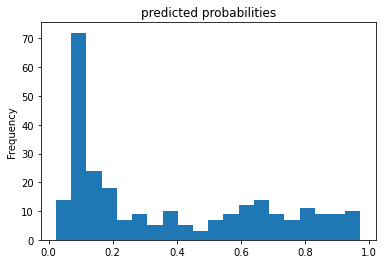

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

That's it for linear regression! Now onto classification.

**Classification**

Now that we've covered linear regression it is time to talk about classification. Where regression was used to predict a numeric value, classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

Since we've touched on how estimators work earlier, I'll go a bit quicker through this example.

This section is based on the following guide from the TensorFlow website. https://www.tensorflow.org/tutorials/estimator/premade

**Imports and Setup**

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd

**Dataset**

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Now we can pop the species column off and use that as our label.

In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape  # we have 120 entires with 4 features

(120, 4)

**Input Function**

Remember that nasty input function we created earlier. Well we need to make another one here! Fortunatly for us this one is a little easier to digest.

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

**Feature Columns**

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns) 

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


**Building the Model**

And now we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.

- DNNClassifier (Deep Neural Network)
- LinearClassifier

We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear coorespondence in our data.

So let's build a model!

In [ ]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpalxs5wlx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


What we've just done is created a deep neural network that has two hidden layers. These layers have 30 and 10 neurons respectively. This is the number of neurons the TensorFlow official tutorial uses so we'll stick with it. However, it is worth mentioning that the number of hidden neurons is an arbitrary number and many experiments and tests are usually done to determine the best choice for these values. Try playing around with the number of hidden neurons and see if your results change.

**Training**

Now it's time to train the model!

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)  #This simply tells the classifier to run for 5000 steps. 
# We include a lambda to avoid creating an inner function previously

**Evaluation**

Now let's see how this trained model does!

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

Notice this time we didn't specify the number of steps. This is because during evaluation the model will only look at the testing data one time.

**Predictions**

Now that we have a trained model it's time to use it to make predictions. I've written a little script below that allows you to type the features of a flower and see a prediction for its class.

In [ ]:
def input_fn(features, batch_size=256):
  #Convert the inputs to a Dataset without labels
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

In [ ]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))

for pred_dict in predictions:
  class_id = pred_dict["class_ids"][0]
  probability = pred_dict["probabilities"][class_id]

  
  print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
SepalLength: 23
SepalLength: 12
SepalLength: 12
SepalLength: 4
SepalLength: 3
SepalLength: 2
SepalLength: 0.5
SepalWidth: 2
SepalWidth: 0.4
PetalLength: 0.5
PetalWidth: 0.3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpalxs5wlx/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (37.2%)


And that's pretty much it for classification!

**Clustering**

Now that we've covered regression and classification it's time to talk about clustering data!

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

Unfortunalty there are issues with the current version of TensorFlow and the implementation for KMeans. This means we cannot use KMeans without writing the algorithm from scratch. We aren't quite at that level yet, so we'll just explain the basics of clustering for now.

Basic Algorithm for K-Means.

- Step 1: Randomly pick K points to place K centroids
- Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

Please refer to the video for an explanation of KMeans clustering.

**Data**

Let's start by discussing the type of data we use when we work with a hidden markov model.

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states.

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

States: In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

Observations: Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.

Transitions: Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.

To create a hidden markov model we need.

- States
- Observation Distribution
- Transition Distribution

For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

**Imports and Setup**

Due to a version mismatch with tensorflow v2 and tensorflow_probability we need to install the most recent version of tensorflow_probability

In [ ]:
!pip install --upgrade tensorflow-probability

In [ ]:
import tensorflow_probability as tfp
import tensorflow as tf

**Weather Model**
Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

We will model a simple weather system and try to predict the temperature on each day given the following information.

- Cold days are encoded by a 0 and hot days are encoded by a 1.
- The first day in our sequence has an 80% chance of being cold.
- A cold day has a 30% chance of being followed by a hot day.
- A hot day has a 20% chance of being followed by a cold day.
- On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

If you're unfamiliar with standard deviation it can be put simply as the range of expected values.

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.

In [ ]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the expected temperatures on each day we can do the following.

In [ ]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

[11.999999 11.1      10.830001 10.748999 10.724699 10.71741  10.715222]


**Neurtal Networks**

**Keras**

Before we dive in and start discussing neural networks, I'd like to give a breif introduction to keras.

From the keras official documentation (https://keras.io/) keras is described as follows.

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU."

Keras is a very powerful module that allows us to avoid having to build neural networks from scratch. It also hides a lot of mathematical complexity (that otherwise we would have to implement) inside of helpful packages, modules and methods.

In this guide we will use keras to quickly develop neural networks.

**Dataset**

For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load dataset
fashion_mnist = keras.datasets.fashion_mnist 

#Split into testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Let's have a look at this data to see what we are working with.

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

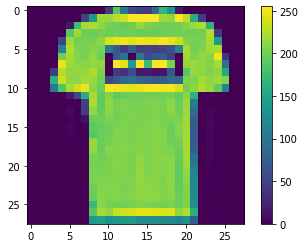

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

**Data Preprocessing**

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**Building the Model**

Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

**Layer 1**: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2**: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3**: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Compile the Model**

The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training the Model**

Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4979 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3769 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3378 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3147 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2968 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2817 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2712 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2591 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2493 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

**Evaluating the Model**

Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar." (https://keras.io/models/sequential/)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8813
Test accuracy: 0.8812999725341797


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as overfitting.

And now we have a trained model that's ready to use to predict some values!

**Making Predictions**

To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict() method.

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([3.1011901e-08, 6.9169789e-07, 1.1001375e-09, 4.7858252e-11,
       4.7556750e-09, 1.4894539e-04, 2.3317522e-08, 3.5590318e-03,
       1.4057159e-07, 9.9629116e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

**Verifying Predictions**

I've written a small function here to help us verify predictions with some simple visuals.

Pick a number: 10


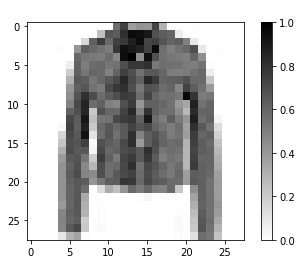

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


**CNN**

In this guide we will learn how to peform image classification and object detection/recognition using deep computer vision with something called a convolutional neural network.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


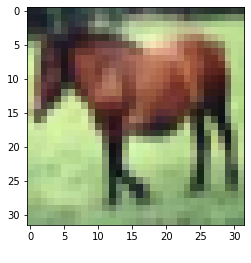

In [ ]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

**CNN Architecture**

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base.**

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()  # let's have a look at our model so far

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

After looking at the summary you should notice that the depth of our image increases but the spacial dimensions reduce drastically.

**Adding Dense Layers**
So far, we have just completed the convolutional base. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).

**Training**
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

Note: This will take much longer than previous models!

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 89s 56ms/step - loss: 1.5519 - accuracy: 0.4317 - val_loss: 1.2586 - val_accuracy: 0.5448
Epoch 2/4
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1790 - accuracy: 0.5791 - val_loss: 1.1477 - val_accuracy: 0.5946
Epoch 3/4
1563/1563 [==============================] - 79s 50ms/step - loss: 1.0285 - accuracy: 0.6381 - val_loss: 0.9980 - val_accuracy: 0.6466
Epoch 4/4
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9342 - accuracy: 0.6706 - val_loss: 0.9678 - val_accuracy: 0.6617


**Evaluating the Model**

We can determine how well the model performed by looking at it's performance on the test data set.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9678 - accuracy: 0.6617 - 4s/epoch - 13ms/step
0.6617000102996826


**NLP**

Natural Language Processing (or NLP for short) is a discipline in computing that deals with the communication between natural (human) languages and computer languages. A common example of NLP is something like spellcheck or autocomplete. Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages.

Recurrent Neural Networks
In this tutorial we will introduce a new kind of neural network that is much more capable of processing sequential data such as text or characters called a recurrent neural network (RNN for short).

We will learn how to use a reccurent neural network to do the following:

Sentiment Analysis
Character Generation
RNN's are complex and come in many different forms so in this tutorial we wil focus on how they work and the kind of problems they are best suited for.



**Movie Review Dataset**

Well start by loading in the IMDB movie review dataset from keras. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# Lets look at one review
train_data[1]

**More Preprocessing**

If we have a look at some of our loaded in reviews, we'll notice that they are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:

if the review is greater than 250 words then trim off the extra words
if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.
Luckily for us keras has a function that can do this for us:

In [ ]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

**Creating the Model**

Now it's time to create the model. We'll use a word embedding layer as the first layer in our model and add a LSTM layer afterwards that feeds into a dense node to get our predicted sentiment.

32 stands for the output dimension of the vectors generated by the embedding layer. We can change this value if we'd like!

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


**Training**
Now it's time to compile and train the model.

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 80s 124ms/step - loss: 0.4192 - acc: 0.8091 - val_loss: 0.2824 - val_acc: 0.8854
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.2397 - acc: 0.9101 - val_loss: 0.2991 - val_acc: 0.8766
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1883 - acc: 0.9307 - val_loss: 0.2669 - val_acc: 0.8938
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1527 - acc: 0.9452 - val_loss: 0.3311 - val_acc: 0.8850
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1313 - acc: 0.9536 - val_loss: 0.2956 - val_acc: 0.8810
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1148 - acc: 0.9610 - val_loss: 0.3628 - val_acc: 0.8774
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1010 - acc: 0.9661 - val_loss: 0.3037 - val_acc: 0.8856
Epoch 8/10
625/625 [==============================] - 6

And we'll evaluate the model on our training data to see how well it performs.

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 21s 27ms/step - loss: 0.4533 - acc: 0.8550
[0.45329999923706055, 0.8550400137901306]


**Making Predictions**

Now let’s use our network to make predictions on our own reviews.

Since our reviews are encoded well need to convert any review that we write into that form so the network can understand it. To do that well load the encodings from the dataset and use them to encode our own data.

In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

1654784/1641221 [==============================] - 0s 0us/step
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [ ]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]
  
print(decode_integers(encoded))

that movie was just amazing so amazing


In [ ]:
# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred) 
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)

[0.9134413]
[0.49175972]
